<a href="https://colab.research.google.com/github/ABHISHEKKHOPADE/DEEP_LEARNING/blob/main/hand_written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [91]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(test_labels)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


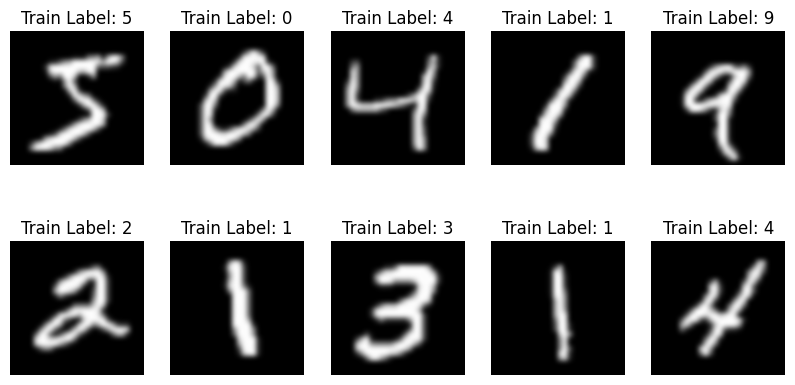

In [92]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    #plt.imshow(train_images[i], cmap='gray')
    plt.imshow(train_images[i] ,cmap='gray',interpolation='bicubic')
    plt.title(f"Train Label: {train_labels[i]}")
    plt.axis('off')  # Hide axes for clarity


plt.show()

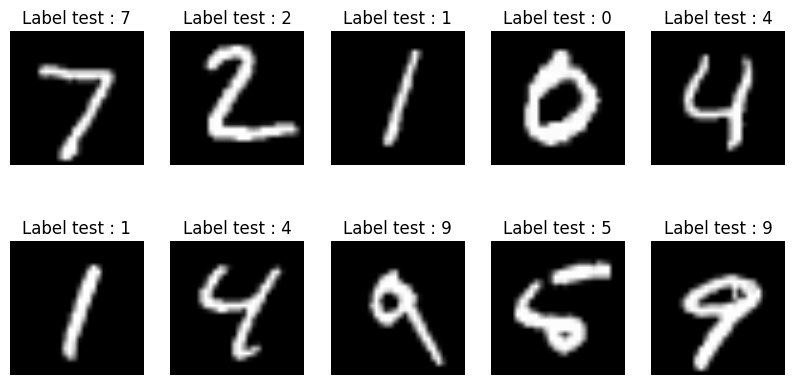

In [93]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_images[i], cmap='gray',interpolation='bilinear')
  # Display image
    plt.title(f"Label test : {test_labels[i]}")
    plt.axis('off')  # Hide axis


plt.show()

In [94]:

# Normalize the image data to [0, 1]


# Reshape to match the input shape of the model (28x28x1)
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

print(train_images.shape,train_labels.shape)
#from tensorflow.keras.utils import to_categorical

#train_labels = to_categorical(train_labels, num_classes=10)
#test_labels = to_categorical(test_labels, num_classes=10)






(60000, 28, 28, 1) (60000,)


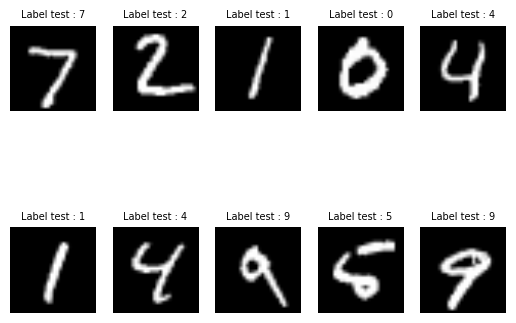

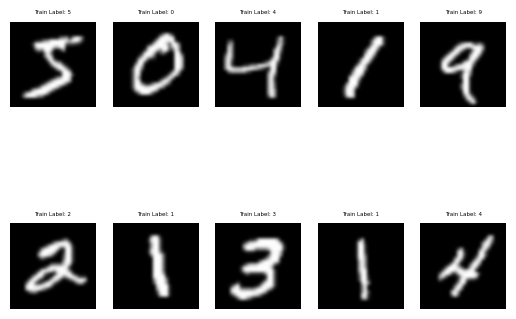

In [95]:

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(test_images[i], cmap='gray',interpolation='bilinear')
  # Display image
    plt.title(f"Label test : {test_labels[i]}",fontsize=7)
    plt.axis('off')  # Hide axis


plt.show()
for i in range(10):
    plt.subplot(2, 5, i+1)
    #plt.imshow(train_images[i], cmap='gray')
    plt.imshow(train_images[i] ,cmap='gray',interpolation='bicubic')
    plt.title(f"Train Label: {train_labels[i]}",fontsize=4)
    plt.axis('off')  # Hide axes for clarity


plt.show()

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

In [98]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # because labels are integers
              metrics=['accuracy'])

# Print model summary
model.summary()
print("train_labels shape:", train_labels.shape)
print("train_labels sample:", train_labels[0])
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',    # or 'val_accuracy'
    min_delta=0.001,
    patience=3,            # stop after 3 epochs with no improvement
    restore_best_weights=True,  # bring back the best weights
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,754 (1.27 MB)

 Trainable params: 330,858 (1.26 MB)

 Non-trainable params: 896 (3.50 KB)

train_labels shape: (60000,)
train_labels sample: 5


In [99]:
# Re-load clean labels
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0


history = model.fit(train_images,train_labels, epochs=10, batch_size=64, callbacks=[early_stop],
                    validation_data=(test_images, test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 205s 188ms/step - accuracy: 0.8926 - loss: 0.3578 - val_accuracy: 0.9885 - val_loss: 0.0350
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 202s 189ms/step - accuracy: 0.9802 - loss: 0.0638 - val_accuracy: 0.9904 - val_loss: 0.0272
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 207s 194ms/step - accuracy: 0.9848 - loss: 0.0465 - val_accuracy: 0.9923 - val_loss: 0.0256
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 181s 193ms/step - accuracy: 0.9878 - loss: 0.0392 - val_accuracy: 0.9935 - val_loss: 0.0206
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 198s 188ms/step - accuracy: 0.9892 - loss: 0.0337 - val_accuracy: 0.9938 - val_loss: 0.0185
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 207s 194ms/step - accuracy: 0.9912 - loss: 0.0293 - val_accuracy: 0.9924 - val_loss: 0.0240
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 206s 198ms/step - accuracy: 0.9912 - loss: 0.0266 - val_accuracy: 0.9936 - val_loss: 0.0175
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 178s 190ms/step - accuracy: 0.9913 -

In [100]:


# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"✅ Final Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.9920 - loss: 0.0235
✅ Final Test Accuracy: 0.9938


In [102]:
import cv2
import numpy as np
import tensorflow as tf

# Load model
#model = tf.keras.models.load_model('model.h5')  # update this

# Load and preprocess image
img = cv2.imread('/content/download (9).jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)  # if background is white
img = img.astype('float32') / 255.0
img = img.reshape(1, 28, 28, 1)

# Predict
pred = model.predict(img)
digit = np.argmax(pred)
print("Predicted Digit:", digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Predicted Digit: 9
